# DFS/BFS (2)
## 스택과 큐를 이용하여 DFS/BFS 구현하고, 문제 풀어보기

# Tree 구조
### Tree : 노드로 이루어진 자료구조
- 트리는 하나의 루트 노드를 갖는다,
- 루트 노드는 0개 이상의 자식 노드를 갖는다.
- 그 자식 노드 또한 0개 이상의 자식 노드를 갖고 있고, 이는 반복적으로 정의된다.
- 트리는 노드와 노드들을 연결하는 간선으로 구성되어 있다.



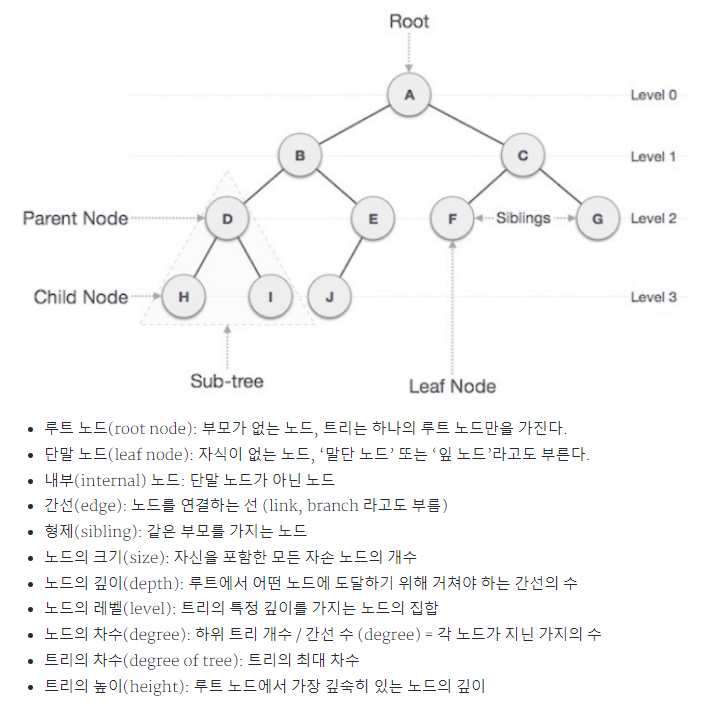

- 트리 구조 참조
https://gmlwjd9405.github.io/2018/08/12/data-structure-tree.html

# 트리 구현하기
###  인접 행렬
#### 2차원 배열로 그래프의 연결 관계를 표현하는 방식
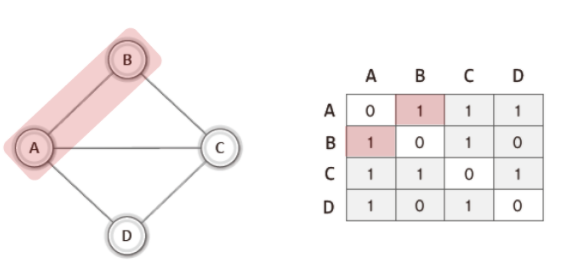

- 각 정점간의 가중치나 간선의 유무를 행렬로 표현한다.
- adj[i][j]는 노드 i에서 j로 가는 간선이 존재할 경우 1, 아니면 0.
- 노드 끼리의 연결여부를 확인하고 싶을 때, adj[i][j]가 0인지 1인지만 확인하면 되므로 시간복잡도가 낮다.
- 하지만, 노드 i에 연결된 모든 노드들에 방문하고자 한다면, j까지 모두 돌아야 한다는 단점이 있다.
- 간선의 방향이 없는(그래프가 방향이 없는) 무향 그래프의 경우에는 i에서 j로 가는 길이 존재하면 j에서 i로 가는 길도 존재한다. 이렇게 인접행렬을 구현하면, 대각 성분을 기준으로 대칭인 성질을 갖게된다. 



### 인접 리스트
#### 리스트로 그래프의 연결관계를 표현하는 방식
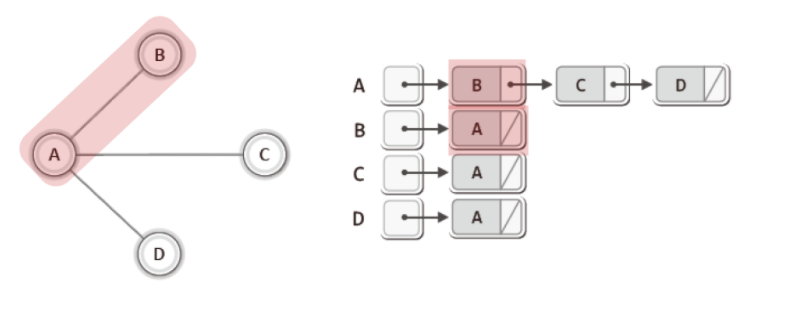

- 실제로 연결된 노드에 대한 정보만 저장하기 때문에, 모든 벡터들의 원소의 개수의 합이 간선의 개수와 동일하다.
- 단점: 노드 i와 j의 연결 여부를 알고 싶을 경우에는 adj[i]를 순회하여 j원소가 존재하는지 확인해야 한다.
- 따라서 인접 리스트를 사용할 것인지 인접 행렬을 사용할 것인지는 문제의 상황에 따라 적절한 표현방식을 이용해야 한다. 

In [ ]:
graph = [[], [B, C, D], [A], [A], [A]]

- 인접행렬과 인접리스트에 대한 보충 설명(구현): https://duwjdtn11.tistory.com/515

- 인접행렬도 자주 사용된다. 그래프와 노드 더 알아보기 : 
https://han-py.tistory.com/242

# DFS
 ### 깊이 우선 탐색. 그래프에서 가장 깊은 부분을 우선적으로 탐색하는 알고리즘이다.
 - 최대한 깊숙이 들어가서 노드를 방문한 후, 다시 돌아가서 다른 경로로 탐색하는 알고리즘이다.
 - 스택 자료구조를 이용
 - 재귀함수로 구현
 - 그래프 보기: https://blog.naver.com/rbdus7174/222260658875
 - 영상 참고: https://www.youtube.com/watch?v=iaBEKo5sM7w

In [8]:
def dfs(graph, v, visited):
    #현재 노드를 방문처리
    visited[v] = True
    print(v, end = " ")
    print("visited[v]", visited[v])
    
    #현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]: #첫번째 노드안의 요소들 탐색
        if not visited[i]: #visited는 graph와 인덱스번호가 동일. #요소들 중에 visited가 없으면 다시 함수를 돌려서 탐색한다.
            #print(visited)
            dfs(graph, i, visited)
            
#각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원 리스트)
graph = [[], #인덱스 1부터 시작하도록 만들기 위해서 첫번째 0 인덱스는 만들어놓고 비워둠 
         [2, 3, 8], #1 
         [1, 7],  #2
         [1, 4, 5], #3
         [3, 5], #4
         [3, 4], #5
         [7], #6
         [2, 6, 8], #7 
         [1, 7] #8
         ] #6

#각 노드가 방문된 정보를 리스트 자료형으로 표현(1차원 리스트)
visited = [False] * 9

#정의된 DFS 함수 호출
dfs(graph, 1, visited)


1 visited[v] True
2 visited[v] True
7 visited[v] True
6 visited[v] True
8 visited[v] True
3 visited[v] True
4 visited[v] True
5 visited[v] True


# BFS
### 너비 우선 탐색. 가장 가까운 노드부터 탐색하는 알고리즘이다.
- 시작 노드를 큐에 삽입한다. 큐에서 노드를 꺼내(선입선출), 해당 노드에 인접하는 노드 중 방문하지 않은 노드를 '모두' 큐에 삽입한다. 
- 마치 피라미드의 윗층부터, 한 층을 모두 검사 한 후 다음 층을 검사하고 이것을 반복하는 방식
- collections의 deque 라이브러리를 사용하여 큐를 구현한다. 
- 최단거리에 유용
- 영상 참고: https://www.youtube.com/watch?v=QRq6p9s8NVg

In [9]:
from collections import deque

def bfs(graph, start, visited):
    queue = deque([start])
    
    #방문처리
    visited[start] = True
    
    #큐에 뭔가 있을 때 반복 = 큐가 빌 때까지 반복
    while queue:
        #큐에서 하나의 원소를 뽑아 출력
        v = queue.popleft()
        print(v, end = " " )
        
        #v의 인접노드 중 방문하지 않은 원소들을 큐에 삽입
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True
visited = [False] * 9

bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 

### 음료수 얼려먹기

- 한 공간에서 최대로 갈 수 있는 곳 까지 가서 탐색하는 DFS 방식을 사용한다.
- 필요한 변수: n(행 개수), m(열 개수), graph(구멍이 뚫려 있는지의 여부 / 방문 여부(방문했다면 +1 )), x y는 graph의 좌표값
- 기능: 해당 좌표의 값이 0이면 방문하고, 그것의 상하좌우를 또 탐색한 후 0이면 방문한다(반복)
- 좌표를 벗어나거나 해당 좌표의 값이 1이다(이미 방문 했다 또는 구멍이 막혀있다), 그러면 방문하지 않는다.
- 한 공간에서 좌표의 값이 False인 곳까지 내려간다.
- 이 기능을 for문을 통해 모든 열과 행을 돌면서 판단한다. 

In [4]:
#0이 모여 있는 곳들을 찾아내서 개수를 센다
n, m = map(int, input().split())

#2차원 리스트로 graph 정보 받기
graph = []
for _ in range(n):
    graph.append(list(map(int, input()))) # [[0, 0, 1, 0, 0], 
                                          #  [], 
                                           # []]
    
#dfs 특정 노드 방문 후 연결된 모든 노드들 방문
def dfs_1(x,y):
    #주어진 범위를 벗어나는 경우에는 종료
    if x<=-1 or x>=n or y<=-1 or y>=m:
        return False
    
    #현재 노드 방문 안했다면
    if graph[x][y] == 0:
        graph[x][y] = 1 #방문처리
        
        #상 하 좌 우 위치도 모두 재귀적으로 호출
        dfs_1(x-1, y) #상
        dfs_1(x+1, y) #하
        dfs_1(x, y-1) #좌
        dfs_1(x, y+1) #우
        return True
    
    #(else)현재 노드를 이미 방문했다면 또는 막혀있다면(1이라면)
    return False

#모든 노드에 대해 탐색
result = 0
for i in range(n):
    for j in range(m): #행을 기준으로 열을 따라가면서 dfs를 수행한다
        #현재 위치에서 dfs 수행
        if dfs_1(i, j) == True:
            result += 1
            
print(result)

4 5
00110
00011
11111
00000
3


### 미로찾기

- 가장 가까운 곳에서부터 다음 진로를 탐색하는 BFS로 문제를 해결한다.
- (DFS을 사용하여 가장 먼 곳에서 부터 진로를 탐색하다보면 여러 번 시도한 것중에 가장 짧은 것을 찾아야 하므로 비효율적이다.)
- 필요한 변수: n(행 개수), m(열 개수), graph(괴물이 없는 부분을 1, 있는 부분을 0), queue(다음에 탐색할 좌표들을 넣고 빼는 공간), x, y(좌표), nx ny(다음에 탐색할 좌표)
- 해당 x y 에서 조건에 맞는 인접한 노드를 탐색하여 queue에 모두 넣고, 하나씩 pop을 하며 또 인접한 노드를 찾아서 queue에 넣고를 반복한다.
- 인접한 노드란 좌표 상에서 상 하 좌 우에 있는 좌표들을 의미한다.


In [2]:
from collections import deque

n, m = map(int, input().split())
graph = []
for _ in range(n):
    info = list(map(int, input()))
    graph.append(info)
print(graph)

#이동방향 (상, 하, 좌, 우) : 인접 노드
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

#bfs
def maze(x,y):
    #bfs 방식
    queue = deque()
    queue.append((x,y)) #튜플형태 / 0,0을 queue에 넣고, 0,0에 인접한 노드들을 검사한다.
    print(queue)
    
    while queue:
        x, y= queue.popleft()  #queue의 맨 처음에 있는 튜플을 pop하고, x,y를 업데이트한다. (nx ny를 x와 y로 업데이트)
        print("x :", x, "y: ", y)
        
        #상하좌우를 탐색하고, 다음으로 나아가야 할 곳을 확인한다.
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            
            #나아가기 위한 조건
            #1. 미로찾기 공간을 벗어난 경우 무시
            if nx<0 or ny<0 or nx>=n or ny>=m:
                continue
            
            if graph[nx][ny] == 0: #2. 괴물이 있는 곳은 피한다. 
                continue
            
            #해당 노드를 처음 방문하는 경우에만 최단 거리 기록
            if graph[nx][ny] == 1: #괴물이 없는 곳
                graph[nx][ny] = graph[x][y] + 1 #다음에 나아가야할 좌표의 값은 이전위치에서의 최단거리 값에 1을 더해서 넣는다. 
                #최단거리 값을 graph의 좌표의 값에다가 업데이트 하는 방식..
                
                queue.append((nx, ny)) #queue에 nx ny를 넣는다.
                print("q: ", queue)
                print("Gra: ", graph)
                print("x :", x, "y: ", y)
                
    
    #가장 오른쪽 아래까지의 최단거리 반환
    return graph[n-1][m-1] #인덱스 번호 때문에 -1 해준다.

print(maze(0,0))

5 6
101010
111111
000001
111111
111111
[[1, 0, 1, 0, 1, 0], [1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
deque([(0, 0)])
x : 0 y:  0
q:  deque([(1, 0)])
Gra:  [[1, 0, 1, 0, 1, 0], [2, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
x : 0 y:  0
x : 1 y:  0
q:  deque([(0, 0)])
Gra:  [[3, 0, 1, 0, 1, 0], [2, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
x : 1 y:  0
q:  deque([(0, 0), (1, 1)])
Gra:  [[3, 0, 1, 0, 1, 0], [2, 3, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
x : 1 y:  0
x : 0 y:  0
x : 1 y:  1
q:  deque([(1, 2)])
Gra:  [[3, 0, 1, 0, 1, 0], [2, 3, 4, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
x : 1 y:  1
x : 1 y:  2
q:  deque([(0, 2)])
Gra:  [[3, 0, 5, 0, 1, 0], [2, 3, 4, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
x : 1 y:  2
q:  deque([(0, 2), (1, 3)])
Gra:  [[3, 0, 5, 0, 1, 0], [2, 3, 4, 5, 1, 1], [0, 0,

### 특정 거리의 도시 찾기
- 필요한 변수 n(도시의 개수 = 노드 개수), m(도로의 개수 = 간선 개수), k 거리정보(최단거리), x 출발 도시의 번호, graph(어떤 노드가 서로 연결되어 있는지), visited(방문기록을 확인)
- BFS를 사용한다. 최단경로의 경우 BFS를 사용하는 것이 더 효과적이다. 가장 가까운 노드부터 탐색하기 때문이다.
- 모든 노드의 visitied를 0으로 설정해두고, 노드가 하나씩 진행될 때마다 이전 visited에 1씩 더하여 현재 visited에 update한다. 그래서 visitied가 k(최단거리)인 것들을 뽑아서 오름차순으로 한 줄 씩 나열한다.

In [6]:
from collections import deque

n, m, k, x = map(int, input().split())
graph = []
for _ in range(n+1):
    graph.append([])
    
for i in range(1, m+1):
    road_sta, road_fin = map(int, input().split())
    graph[road_sta].append(road_fin)
print(graph)


from collections import deque
def city(x, k):
    queue = deque()
    queue.append(x)
    
    while queue:
        v = queue.popleft()
        for i in graph[v]:
            if visited[i] == 0:
                queue.append(i)
                visited[i] = visited[v] + 1 
                print(visited)     
                
    res = []
    #res가 아무것도 없다
    if k in res == False:
        return -1
    else:
        for i in range(len(visited)):
            if visited[i] == k:
                res.append(str(i))
        res.sort()
        return " ".join(res)
    
visited = [0] * (n+1)
print(city(x, k))

6 6 2 1
1 2
2 3
3 6
2 6
1 4
4 5
[[], [2, 4], [3, 6], [6], [5], [], []]
[0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0]
[0, 0, 1, 2, 1, 0, 0]
[0, 0, 1, 2, 1, 0, 2]
[0, 0, 1, 2, 1, 2, 2]
3 5 6


In [7]:
#예시 답안: bfs 를 수행하여 모든 도시까지의 최단거리를 계산한 뒤에 각 최단 거리를 하나씩 확인하여 그 값이 k인 경우에 해당 도시의 번호를 출력한다.


from collections import deque
n, m, k, x = map(int, input().split())
graph = [[] for _ in range(n+1)]

for _ in range(m):
    a, b = map(int, input().split())
    graph[a].append(b)
    
#모든 도시에 대한 최단 거리 초기화(-1)
distance = [-1] * (n+1)
distance[x] = 0 #출발 도시까지의 거리는 0으로 설정

#bfs
q = deque([x])
while q:
    now = q.popleft()
    
    #현대 도시에서 이동할 수 있는 모든 도시를 확인
    for next_node in graph[now]:
        
        #아직 방문 안했다
        if distance[next_node] == -1:
            #최단 거리 갱신
            distance[next_node] = distance[now] + 1
            q.append(next_node)
            
#최단 거리가 k인 모든 도시의 번호를 오름차순으로 출력
check = False
for i in range(1, n+1):
    if distance[i] == k:
        print(i)
        check = True
    
#distance의 모든 원소를 돌아도 check=True가 없다 (만약 최단 거리가 k인 도시가 없다면 -1출력)
if check == False:
    print(-1)
        

6 6 2 1
1 2
2 3
3 6
2 6
1 4
4 5
3
5
6


### 괄호 변환
 - 균형잡힌 괄호 문자: 두 괄호의 '개수'만 똑같을 떄
 - 올바른 괄호 문자: 두 괄호의 개수가 맞으며 짝이 맞을 때
 - 1 입력이 빈 문자열인 경우, 빈 문자열을 반환
 - 2 문자열 w를 두 균형잡힌 괄호 문자열, u, v로 분리한다. 단 u는 균형잡힌 괄호 문자열로 더 이상 분리할 수 없어야 하며, v는 빈 문자열이 될 수 있다.
 - 3 수행한 결과 문자열을 u에 이어 붙인 후 반환한다.
  - 문자열 u가 올바른 괄호 문자열이라면, 문자열 v에 대해 1단계부터 다시 수행한다.
 - 4 문자열 u가 올바른 문자열이 아니라면..
  - 빈 문자열에 (붙임
  - 문자열 v에 대해 1단계부터 재귀적으로 수행한 결과 문자열을 이어 붙인다.
  - )를 다시 붙인다
  - u의 첫 번째와 마지막 문자를 제거하고, 나머지 문자열의 괄호 방향을 뒤집어서 뒤로 붙인다.
  - 생성된 문자열을 반환한다.
  
 - "재귀적" -> DFS
 - 문제 : https://programmers.co.kr/learn/courses/30/lessons/60058

In [ ]:
#재귀함수 사용 (BFS)  #None뜸
def right_bracket(x):
    stack = []
    res = []
    for j in range(len(x)):
        if x[j] =="(":
            stack.append(x[j])
        elif x[j] ==")":
            if len(stack) != 0:
                stack.pop()
            else:
                res.append("NO")
                break
    if res: 
        return res
    elif len(stack) != 0:
        return "NO"
    else:
        return "YES"

def bracket(w):
    #1. 입력이 빈 문자열일 경우, 빈 문자열을 반환한다.
    if w == "":
        print(w)
        return w
    #w자체가 올바른 괄호이면 w그대로 return
    if right_bracket(w) == "YES":
        print(w)
        return w
    
    #2. w를 u,v로 분리한다.
    bracket_box = []
    for b in w:
        bracket_box.append(b)
        if bracket_box.count("(") == bracket_box.count(")"):
            u = "".join(bracket_box)
            break
    print(u)
    try:
        v = w[len(u):]
    except:
        v = ""
        return u+v
    
    #3. 수행한 결과를 u에 이어 붙인 후 반환한다.
    #print("u: ", u, "v: ", v)
    if right_bracket(u) == "YES":
        bracket(v)

    #4. u가 올바르지 않다면,
    else:
        las = "("
        las += bracket(v)
        las += ")"
        for l in u[1:-1]:
            if l == ")":
                l = "("
            elif l == "(":
                l = ")"
                
        las += u[1:-1]
        print(las)
        
        
w = input()  
a = bracket(w)
print(a)


In [ ]:
#민화언니

#균형잡힌 문자열
def balanced(s):
    for i in range(len(s)):
        left=[]
        right=[]
        for s in s:
            if s=="(":
                left.append(s)
            elif s==")":
                right.append(s)
    if len(left)==len(right):
        return True
    else: return False

#올바른 문자열
def proper(s):
    if '(' and ')' in s:
        s.replace("(",'')
        s.replace(")",'')
    if len(s)==0:
        return True
    else: return False


#해결
def solution(p):
    answer=""
    u=""
    v=""
    if len(p)==0 or proper(p): return p
    for i in range(2, len(p), 2):
        if balanced(p[0:i]):
            u=p[0:i]
            v=p[i:len(p)]
            break
    if proper(u):
        answer+=u+solution(v)
    else: 
        answer+='('+solution(v)+')'
        length=len(u)-1
        answer+='('+solution(v)+')'
        u=u[1:length]
        u.replace('(', ')')
        u.replace(')','(')
        answer+u
    return answer